In [12]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats

In [185]:
# Load the data from JHU
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [186]:
df.head(3)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,121,121,128,130,133,133,133,133,135,135
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6


In [187]:
US = df[(df["Country_Region"] == "US")]

In [188]:
US.head(3)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,121,121,128,130,133,133,133,133,135,135
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6


In [189]:
dateColumns = US.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2' ,'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
dates = dateColumns.columns
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [190]:
US_states = US.groupby(['Province_State']).sum()
US_states = US_states.loc[:, '1/22/20':]
US_states = US_states.sort_values(by='Province_State', ascending=False)
US_states.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Wyoming,0,0,0,0,0,0,0,0,0,0,...,216,221,230,239,261,270,275,282,287,296
Wisconsin,0,0,0,0,0,0,0,0,0,0,...,2578,2710,2886,3068,3213,3341,3428,3555,3721,3875
West Virginia,0,0,0,0,0,0,0,0,0,0,...,412,483,514,574,577,593,611,640,702,728
Washington,1,1,1,1,1,1,1,1,1,1,...,8692,9276,9639,10119,10434,10609,10635,10799,10942,11057
Virginia,0,0,0,0,0,0,0,0,0,0,...,3335,3645,4042,4509,5077,5274,5747,6182,6500,6889


In [191]:
def daily_DF(df):
    # this cell by Leaf Petersen
    # Copy the data frame
    dfdaily=df.copy()

    # We are on the first iteration
    first=True
    # For every column
    for column in df:
       # If this is the first iteration
       if first:
         # Save the first column
         prev = column
         # Copy over the first column unchanged
         dfdaily[column]=df[column]
         # All subsequent iterations are not the first
         first=False
         # Skip the rest of the loop
         continue
       # We are not the first iteration, so keep going
       # Set the new column contents to the difference of the
       # previous column and the current column
       dfdaily[column] = df[column]-df[prev]
       # The current column is the previous column for the next iteration
       prev = column
        
    # We only want the totals
    #dfdaily = dfdaily.sum().to_frame()
    #dfdaily = dfdaily.reset_index()
    # Negatives into positives
    dfdaily[0] = dfdaily[0].abs()
    
    return(dfdaily)

In [192]:
# this cell by Leaf Petersen
# Copy the data frame
dfdaily=US_states.copy()

# We are on the first iteration
first=True
# For every column
for column in US_states:
   # If this is the first iteration
   if first:
     # Save the first column
     prev = column
     # Copy over the first column unchanged
     dfdaily[column]=US_states[column]
     # All subsequent iterations are not the first
     first=False
     # Skip the rest of the loop
     continue
   # We are not the first iteration, so keep going
   # Set the new column contents to the difference of the
   # previous column and the current column
   dfdaily[column] = US_states[column]-US_states[prev]
   # The current column is the previous column for the next iteration
   prev = column
dfdaily.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Wyoming,0,0,0,0,0,0,0,0,0,0,...,6,5,9,9,22,9,5,7,5,9
Wisconsin,0,0,0,0,0,0,0,0,0,0,...,129,132,176,182,145,128,87,127,166,154
West Virginia,0,0,0,0,0,0,0,0,0,0,...,67,71,31,60,3,16,18,29,62,26
Washington,1,0,0,0,0,0,0,0,0,0,...,381,584,363,480,315,175,26,164,143,115
Virginia,0,0,0,0,0,0,0,0,0,0,...,457,310,397,467,568,197,473,435,318,389


In [193]:
values = dfdaily[:].replace(0, np.nan)
values.tail(25)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Maryland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,326.0,1158.0,656.0,783.0,726.0,531.0,711.0,536.0,560.0,752.0
Maine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,18.0,23.0,26.0,30.0,17.0,65.0,37.0,35.0,26.0
Louisiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1417.0,746.0,1253.0,970.0,761.0,581.0,421.0,502.0,433.0,581.0
Kentucky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,194.0,NaN,192.0,352.0,NaN,270.0,55.0,30.0,162.0,225.0
Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,134.0,70.0,1.0,158.0,69.0,46.0,51.0,63.0,111.0
Iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,99.0,125.0,118.0,122.0,77.0,123.0,189.0,96.0,146.0
Indiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,554.0,433.0,408.0,556.0,528.0,493.0,431.0,168.0,433.0,582.0
Illinois,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,9.0,2807.0,1.0,2808.0,1293.0,1672.0,1173.0,1223.0,1345.0,1141.0
Idaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,40.0,22.0,122.0,42.0,11.0,19.0,38.0,9.0,114.0


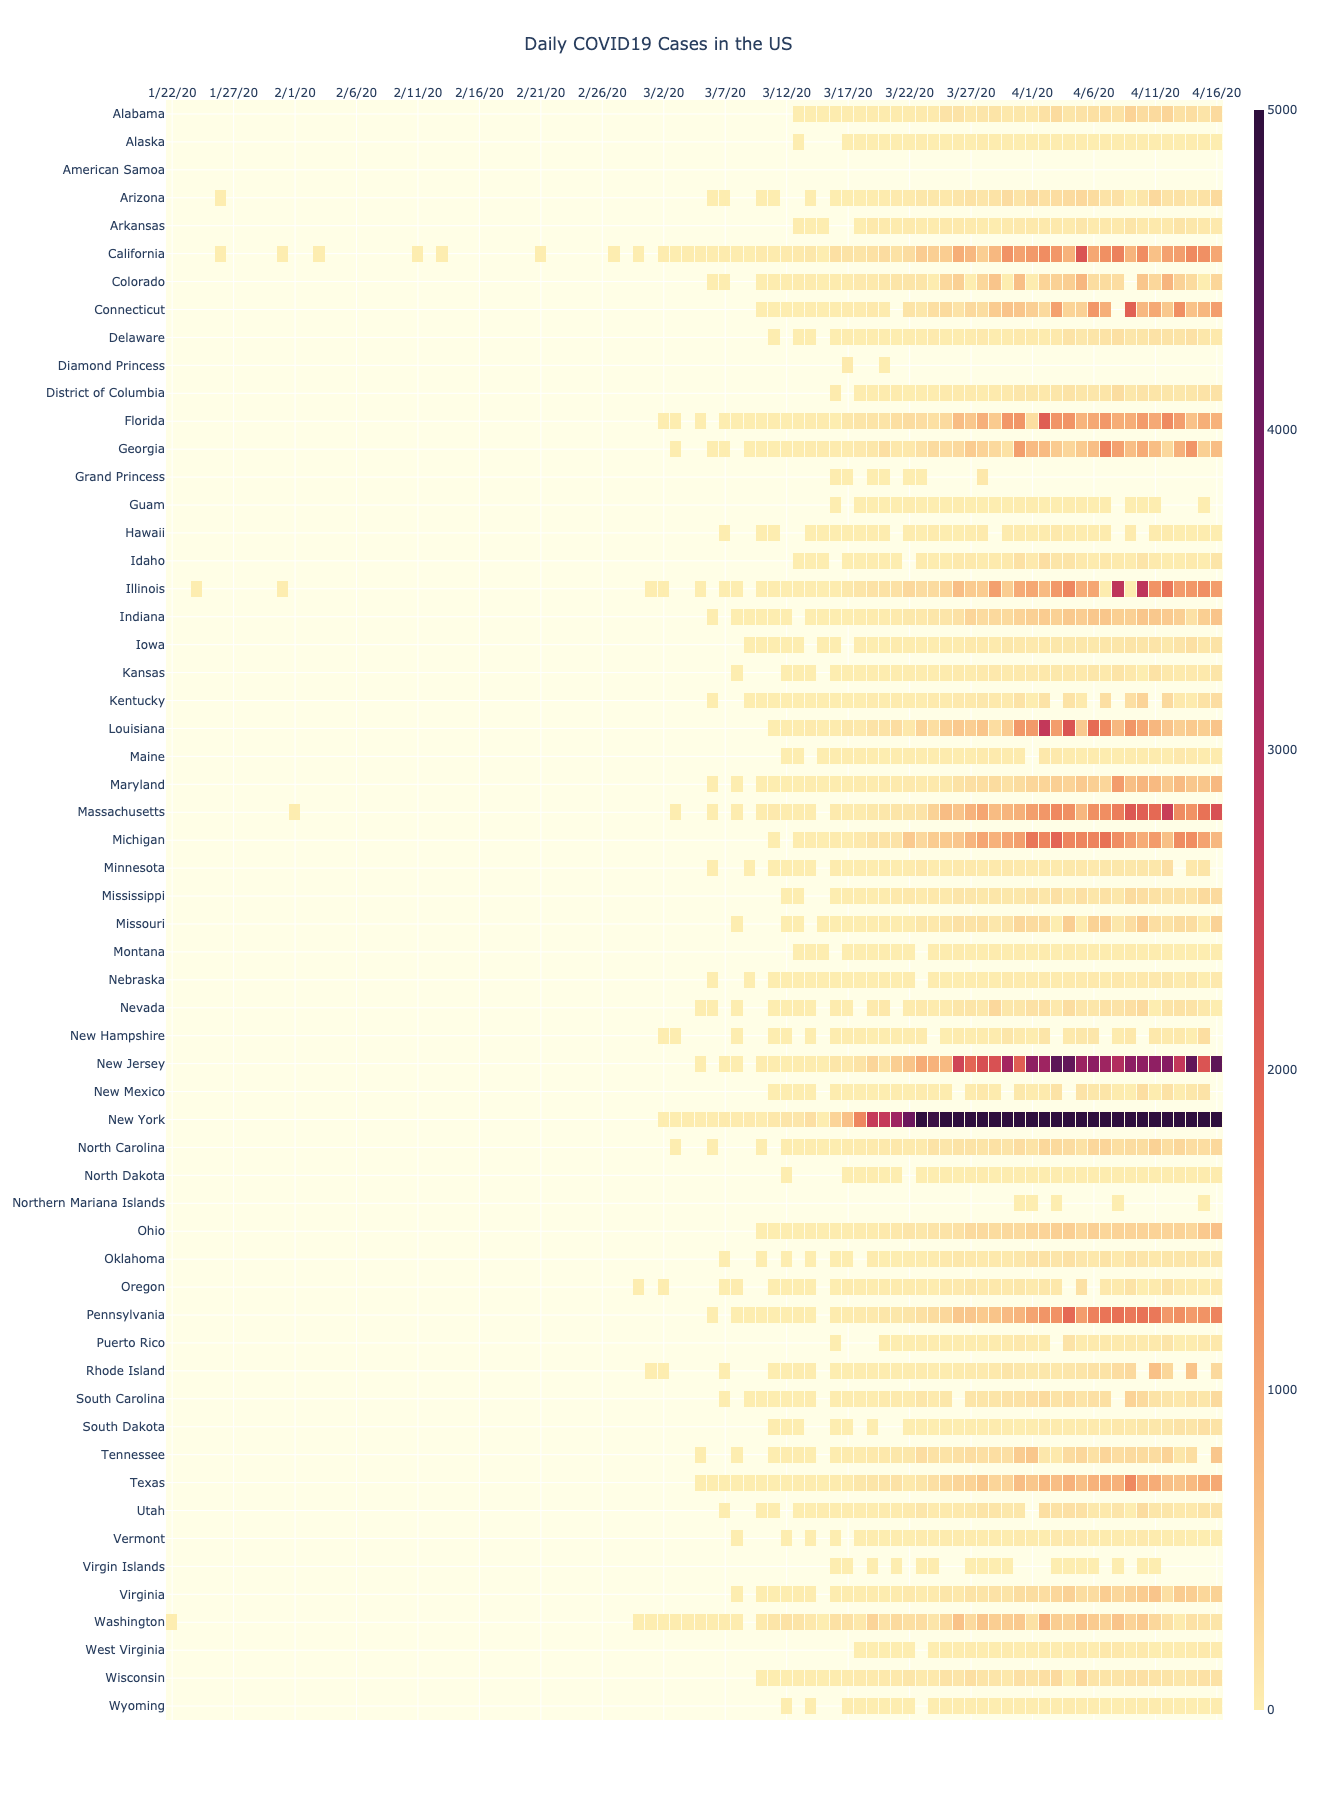

In [198]:
import plotly.graph_objects as go
import datetime
import numpy as np
np.random.seed(1)

fig = go.Figure(data=go.Heatmap(
        z=values,
        x=dates,
        y=values.index,
        colorscale='matter',
        xgap=1,
        ygap=12,
        zmin=0,
        zmid=2500,
        zmax=5000,
        colorbar=dict(thickness=10),
        connectgaps=False
               )
        )

fig.update_layout(
    title=dict(text='Daily COVID19 Cases in the US', x=0.5),
    xaxis_nticks=18,
    yaxis_nticks=60,
    height=1800,
    paper_bgcolor='rgba(0,0,0,0)', 
    plot_bgcolor='#fffee6',)

fig.update_xaxes(side='top', fixedrange=True,)

fig.show(displayModeBar=False)
    
import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)